# Required libraries for EDA 

In [1]:
## To work with data

import numpy as np 
import pandas as pd 

## Visualization

import matplotlib.pyplot as plt 
import seaborn as sns

# Importing working dataset

In [2]:
df = pd.read_csv('C:/Users/DELL/Desktop/BI BOOTCAMP PROJECTS/Business Intelligence on Ed-Tech Data/online_All_Business_p1_p626.csv')
df.head(2)

id                                              title  \
0  762616  The Complete SQL Bootcamp 2020: Go from Zero t...   
1  937678  Tableau 2020 A-Z: Hands-On Tableau Training fo...   

                                  url  is_paid  num_subscribers  avg_rating  \
0  /course/the-complete-sql-bootcamp/     True           295509     4.66019   
1                  /course/tableau10/     True           209070     4.58956   

   avg_rating_recent   rating  num_reviews  is_wishlisted  \
0            4.67874  4.67874        78006          False   
1            4.60015  4.60015        54581          False   

   num_published_lectures  num_published_practice_tests               created  \
0                      84                             0  2016-02-14T22:57:48Z   
1                      78                             0  2016-08-22T12:10:18Z   

         published_time  discount_price__amount discount_price__currency  \
0  2016-04-06T05:16:11Z                   455.0                      INR   
1  2016-08-23T16:59:49Z                   455.0                      INR   

  discount_price__price_string  price_detail__amount price_detail__currency  \
0                         ₹455                  8640                    INR   
1                         ₹455                  8640                    INR   

  price_detail__price_string  
0                     ₹8,640  
1                     ₹8,640

In [3]:
df.tail(2)

id                                              title  \
9445  2769588  Business Efficiency: How To Increase Workplace...   
9446  2801192                        How to enter the US market?   

                                                    url  is_paid  \
9445  /course/business-efficiency-how-to-increase-wo...     True   
9446                /course/how-to-enter-the-us-market/     True   

      num_subscribers  avg_rating  avg_rating_recent   rating  num_reviews  \
9445             1716     3.66667            3.52632  3.52632            3   
9446               14     5.00000            5.00000  5.00000            3   

      is_wishlisted  num_published_lectures  num_published_practice_tests  \
9445          False                       7                             0   
9446          False                       5                             0   

                   created        published_time  discount_price__amount  \
9445  2020-01-20T18:10:33Z  2020-01-21T16:25:32Z                   455.0   
9446  2020-02-07T06:16:29Z  2020-02-11T22:10:35Z                   455.0   

     discount_price__currency discount_price__price_string  \
9445                      INR                         ₹455   
9446                      INR                         ₹455   

      price_detail__amount price_detail__currency price_detail__price_string  
9445                  6400                    INR                     ₹6,400  
9446                  6400                    INR                     ₹6,400

In [4]:
df.shape

(9447, 20)

In [5]:
# Basic Information about dataset:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9447 entries, 0 to 9446
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            9447 non-null   int64  
 1   title                         9447 non-null   object 
 2   url                           9447 non-null   object 
 3   is_paid                       9447 non-null   bool   
 4   num_subscribers               9447 non-null   int64  
 5   avg_rating                    9447 non-null   float64
 6   avg_rating_recent             9447 non-null   float64
 7   rating                        9447 non-null   float64
 8   num_reviews                   9447 non-null   int64  
 9   is_wishlisted                 9447 non-null   bool   
 10  num_published_lectures        9447 non-null   int64  
 11  num_published_practice_tests  9447 non-null   int64  
 12  created                       9447 non-null   object 
 13  pub

# Dropping columns that I wont'be needing in this project. Most of the columns are similar and little relevance

In [6]:
df.drop(['url','discount_price__price_string','price_detail__price_string','discount_price__currency','price_detail__currency',
        'published_time','avg_rating_recent'], axis = 1, inplace = True)

##### Dropped 7 columns

In [7]:
df.shape

(9447, 13)

## Checking Null Values

In [8]:
df.isnull().sum()

id                                0
title                             0
is_paid                           0
num_subscribers                   0
avg_rating                        0
rating                            0
num_reviews                       0
is_wishlisted                     0
num_published_lectures            0
num_published_practice_tests      0
created                           0
discount_price__amount          510
price_detail__amount              0
dtype: int64

**There are Total 510 Null Values in Data**

**column:discount_price__amount         ---->>  510 Nulls**


# Filling Null Values

In [9]:
# min, median & mode values of discount_price__amount column is same.
# sometimes mean value will be effected by otliers in data

df.discount_price__amount.median()

455.0

In [10]:
#Filling NULL values in 'discount_price__amount' column :  with "median" 

df["discount_price__amount"].fillna(df["discount_price__amount"].median(),inplace=True)

In [11]:
df.isnull().sum()

id                              0
title                           0
is_paid                         0
num_subscribers                 0
avg_rating                      0
rating                          0
num_reviews                     0
is_wishlisted                   0
num_published_lectures          0
num_published_practice_tests    0
created                         0
discount_price__amount          0
price_detail__amount            0
dtype: int64

**NO NULL VALUES IN DATA**

In [12]:
df.describe().T

count          mean            std     min  \
id                            9447.0  1.456603e+06  895660.094130  2762.0   
num_subscribers               9447.0  3.399298e+03   10451.534122     3.0   
avg_rating                    9447.0  4.138522e+00       0.453581     1.0   
rating                        9447.0  4.124756e+00       0.478410     1.0   
num_reviews                   9447.0  2.990545e+02    1826.867472     3.0   
num_published_lectures        9447.0  3.440087e+01      46.061088     0.0   
num_published_practice_tests  9447.0  1.018313e-01       0.580037     0.0   
discount_price__amount        9447.0  4.871495e+02     241.172266   455.0   
price_detail__amount          9447.0  4.828758e+03    3108.307674  1280.0   

                                       25%           50%           75%  \
id                            673031.00000  1.381806e+06  2.154793e+06   
num_subscribers                  141.00000  9.160000e+02  2.889500e+03   
avg_rating                         3.90000  4.200000e+00  4.450000e+00   
rating                             3.87941  4.206080e+00  4.447495e+00   
num_reviews                       12.00000  3.300000e+01  1.100000e+02   
num_published_lectures            13.00000  2.300000e+01  3.900000e+01   
num_published_practice_tests       0.00000  0.000000e+00  0.000000e+00   
discount_price__amount           455.00000  4.550000e+02  4.550000e+02   
price_detail__amount            1600.00000  3.840000e+03  8.640000e+03   

                                    max  
id                            3469452.0  
num_subscribers                374836.0  
avg_rating                          5.0  
rating                              5.0  
num_reviews                     78006.0  
num_published_lectures            699.0  
num_published_practice_tests        6.0  
discount_price__amount           3200.0  
price_detail__amount            12800.0

In [13]:
# Data types

df.dtypes

id                                int64
title                            object
is_paid                            bool
num_subscribers                   int64
avg_rating                      float64
rating                          float64
num_reviews                       int64
is_wishlisted                      bool
num_published_lectures            int64
num_published_practice_tests      int64
created                          object
discount_price__amount          float64
price_detail__amount              int64
dtype: object

In [14]:
# created column is in object formate 

df.created

0       2016-02-14T22:57:48Z
1       2016-08-22T12:10:18Z
2       2017-09-26T16:32:48Z
3       2015-10-23T13:34:35Z
4       2015-10-12T06:39:46Z
                ...         
9442    2018-09-27T04:37:00Z
9443    2018-11-29T13:39:30Z
9444    2018-10-13T10:03:33Z
9445    2020-01-20T18:10:33Z
9446    2020-02-07T06:16:29Z
Name: created, Length: 9447, dtype: object

In [15]:
type(df['created'])

pandas.core.series.Series

In [16]:
df['created'] = pd.to_datetime(df['created'])
df['date_created'] = df['created'].dt.date

In [17]:
df['date_created']

0       2016-02-14
1       2016-08-22
2       2017-09-26
3       2015-10-23
4       2015-10-12
           ...    
9442    2018-09-27
9443    2018-11-29
9444    2018-10-13
9445    2020-01-20
9446    2020-02-07
Name: date_created, Length: 9447, dtype: object

In [18]:
df['year'] = pd.DatetimeIndex(df.date_created).year
df['month'] = pd.DatetimeIndex(df.date_created).month
df['day'] = pd.DatetimeIndex(df.date_created).day

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9447 entries, 0 to 9446
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype              
---  ------                        --------------  -----              
 0   id                            9447 non-null   int64              
 1   title                         9447 non-null   object             
 2   is_paid                       9447 non-null   bool               
 3   num_subscribers               9447 non-null   int64              
 4   avg_rating                    9447 non-null   float64            
 5   rating                        9447 non-null   float64            
 6   num_reviews                   9447 non-null   int64              
 7   is_wishlisted                 9447 non-null   bool               
 8   num_published_lectures        9447 non-null   int64              
 9   num_published_practice_tests  9447 non-null   int64              
 10  created                       9447 n

# **Exploratory Data Analysis**

#### Checking for Correlation between variables:

<AxesSubplot:>

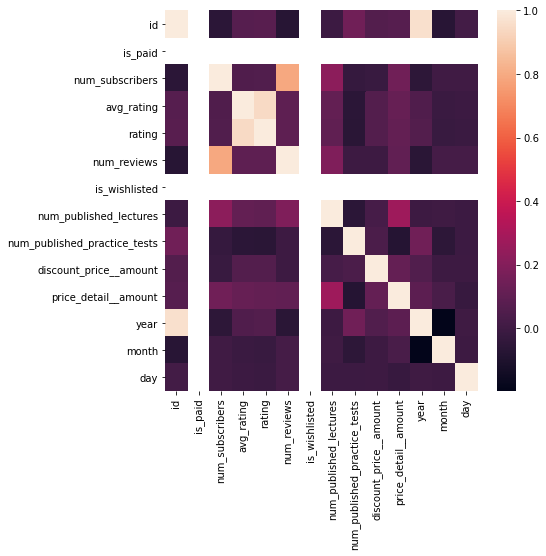

In [20]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr())

* THERE IS LITTLE CORRELATION BETWEEN **num_reviews** and **num_subscribers**

**CHECKING FOR OUTLIERS**

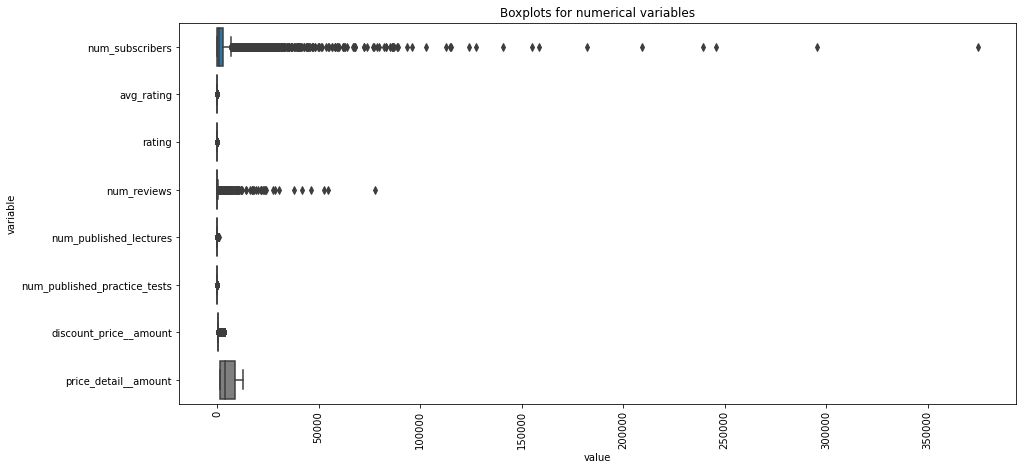

In [21]:
#checking for ouliers

newnumeric=df[["num_subscribers","avg_rating","rating","num_reviews","num_published_lectures","num_published_practice_tests",
               "discount_price__amount","price_detail__amount"]]
newnumericmelt=newnumeric.melt()
plt.figure(figsize=(15,7))
plt.title("Boxplots for numerical variables")
sns.boxplot(y="variable",x="value",data=newnumericmelt)
plt.xticks(rotation=90)
plt.show()

* Number of subcribers and Number of reviews varies from course to course thats why in this data iam not removing outliers.

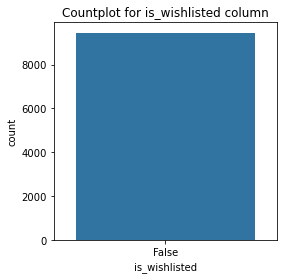

In [22]:
# plotting is_wishlisted

plt.figure(figsize=(4,4))
sns.countplot(x="is_wishlisted",data=df)
plt.title("Countplot for is_wishlisted column")
plt.show()

In [23]:
df['is_wishlisted'].nunique()

1

* No observation is recorded for TRUE.......All observations are FALSE.

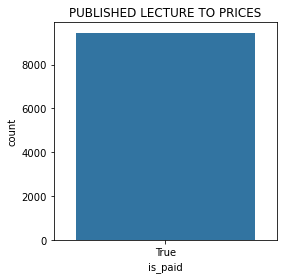

In [24]:
plt.figure(figsize=(4,4))
sns.countplot(x=df['is_paid'])
plt.title("PUBLISHED LECTURE TO PRICES")
plt.show()

* All the courses in this data set are paid courses

In [25]:
n = len(pd.unique(df['id']))
n

9447

In [26]:
df['id'].nunique()

9447

* ALL VALUES ID COLUMN ARE UNIQUE

**PUBLISHED LECTURES TO PRICE**

Text(0.5, 1.0, 'PUBLISHED LECTURE TO PRICES')

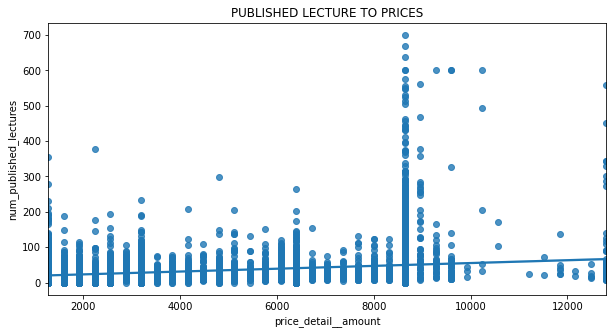

In [27]:
plt.figure(figsize=(10,5))
# Y = a + bx -->> formula
sns.regplot(x = df['price_detail__amount'],y = df['num_published_lectures'])
plt.title("PUBLISHED LECTURE TO PRICES")

* There is a little correlation with the number of published lectures and prices, the more lectures are published, higher the cost of course.


* Number Of Published Lectures are Incresed Between 8000 to 10000 Price Detail Amount.

Text(0.5, 1.0, 'PUBLISHED TEST TO PRICES')

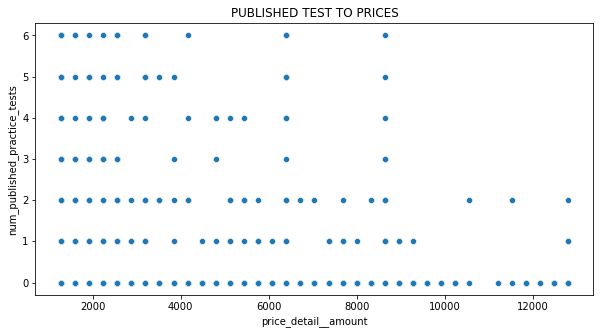

In [28]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = df['price_detail__amount'], y = df['num_published_practice_tests'])
plt.title("PUBLISHED TEST TO PRICES")

* The number of practical test does not really affect the price of courses,based on the above chart 

**REVIEWS TO RATINGS**

Text(0.5, 1.0, 'REVIEWS TO RATING')

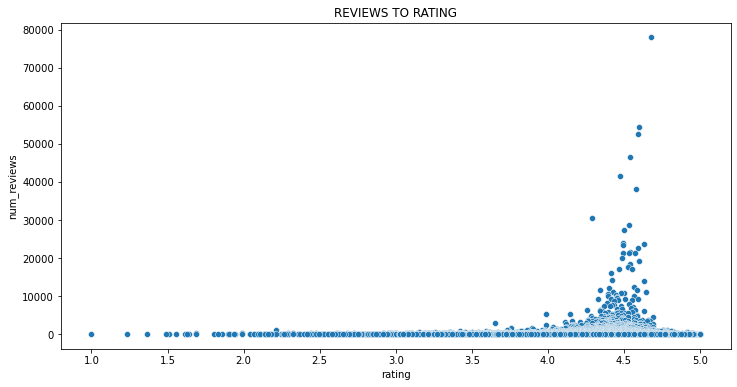

In [29]:
plt.figure(figsize=(12,6))
sns.scatterplot(x = df['rating'], y = df['num_reviews'])
plt.title("REVIEWS TO RATING")

* The number of reviews does affect the rating but not very much.From the above chart, higher the number of reviews, higher the rating of a course.

In [30]:
Top_rated = df[['title','rating']].sort_values(by = 'rating', ascending = False).head(10)
Top_rated

title  rating
9446                        How to enter the US market?     5.0
6821   Energizing Your Powerful Entrepreneurial Mindset     5.0
8924               The Science of Teams (TSoT) - Theory     5.0
8917  Create a Money Making Pitch for More Customers...     5.0
8890                          Become a Student Investor     5.0
8881  Mastering Productivity For The Busy Professional      5.0
8878  3 Online Business / Side Hustle Ideas For Spor...     5.0
8872         Just Give me the Codes: Entry Level Python     5.0
8861  The Consulting Case Interview: Beginner to Expert     5.0
9140  Increase Your Profit by Understanding the Numbers     5.0

* TOP 10 MOST RATED COURSES

**COURSES WITH HIGHEST NUMBER OF PRACTICAL TESTS**

In [31]:
df[['title','num_published_practice_tests','rating']].sort_values(by = 'num_published_practice_tests',ascending = False).head(10)

title  \
7727  Portfolio Management Professional - PfMP Pract...   
5197  PMP® Exam Practice Test-1000 questions+ 400 FR...   
8246                  SHRM-SCP HR PRACTICE EXAMS - 2020   
8417  CPA 2020 Business Environment & Concepts (BEC)...   
4185   Level 4 Diploma - Defining Business Needs (L4M2)   
9114  Level 4 Diploma - Whole Life Asset Management ...   
3044                           Become a QlikView Expert   
7292  Risk Management Professional (PMI-RMP) Practic...   
3381           Lean Six Sigma Black Belt Practice Tests   
7045  Certified Internal Auditor (CIA) - Part 2 prac...   

      num_published_practice_tests   rating  
7727                             6  4.93817  
5197                             6  3.75377  
8246                             6  3.54546  
8417                             6  5.00000  
4185                             6  4.12986  
9114                             6  3.08774  
3044                             6  3.74590  
7292                             6  4.11750  
3381                             6  4.56219  
7045                             6  4.13924

## Most Reviewed course:

In [32]:
df['num_reviews'].nunique()

1176

In [33]:
df.title.nunique()

9424

* THERE ARE **9424** UNIQUE VALUES IN  **title**  COLUMN AND
* **1176** UNIQUE VALUES IN  **num_reviews**  COLUMN

In [34]:
# Most reviewed top 50 courses:

df[['title','num_reviews']].sort_values(by='num_reviews',ascending = False).iloc[:50,:]

title  num_reviews
0   The Complete SQL Bootcamp 2020: Go from Zero t...        78006
1   Tableau 2020 A-Z: Hands-On Tableau Training fo...        54581
2              PMP Exam Prep Seminar -  PMBOK Guide 6        52653
3          The Complete Financial Analyst Course 2020        46447
4   An Entire MBA in 1 Course:Award Winning Busine...        41630
5   Microsoft Power BI - A Complete Introduction [...        38093
6   Agile Crash Course: Agile Project Management; ...        30470
7   Beginner to Pro in Excel: Financial Modeling a...        28665
8   Become a Product Manager | Learn the Skills & ...        27408
9       The Business Intelligence Analyst Course 2020        23906
10  Microsoft Power BI - Up & Running With Power B...        23580
11                     Business Analysis Fundamentals        23326
12            Leadership: Practical Leadership Skills        22595
13       The Complete Foundation Stock Trading Course        21537
14  SQL - MySQL for Data Analytics and Business In...        21436
15  The Complete Financial Analyst Training & Inve...        21421
16  The Ultimate Hands-On Hadoop - Tame your Big D...        21394
17        The Complete Investment Banking Course 2020        19970
18  How to Start an Amazon FBA Store on a Tight Bu...        19328
19  Deep Learning Prerequisites: The Numpy Stack i...        18322
20  Python for Finance: Investment Fundamentals & ...        17617
21  Forex Trading A-Z™ - With LIVE Examples of For...        17016
22  Introduction to Finance, Accounting, Modeling ...        17013
23  Write Better Emails: Tactics for Smarter Team ...        15956
24  Beginning Project Management: Project Manageme...        14255
25    The Complete Shopify Aliexpress Dropship course        14006
26  Writing With Flair: How To Become An Exception...        12478
27  Agile Fundamentals: Including Scrum and Kanban...        11977
28  SQL for Data Analysis: Weekender Crash Course ...        11660
29         Sales Training: Practical Sales Techniques        11529
30  Ninja Writing: The Four Levels Of Writing Mastery        11007
31  Tableau 20 Advanced Training: Master Tableau i...        10979
32  Tableau for Beginners: Get CA Certified, Grow ...        10725
33                                Conscious Listening        10671
34  Email Etiquette: Write More Effective Emails A...        10470
35  The Complete Presentation and Public Speaking/...        10288
36  CAPM Exam Prep Seminar - PMBOK Guide, Sixth Ed...        10102
37          Robotic Process Automation - RPA Overview        10059
38  Power BI A-Z: Hands-On Power BI Training For D...         9631
39  Emotional Intelligence at Work: Learn from You...         9594
40                                  Powerful speaking         9520
42  The Complete Communication Skills Master Class...         9196
41  eBay Drop Shipping Guide with No Inventory - W...         9195
43    Accounting in 60 Minutes - A Brief Introduction         9107
44  Blockchain A-Z™: Learn How To Build Your First...         9081
45                               Six Sigma White Belt         8925
46                        Security Awareness Training         8915
47  Fundamentals of Analyzing Real Estate Investments         8591
48  Communication Fundamentals: How To Communicate...         8122
49          MBA in a Box: Business Lessons from a CEO         7815

In [35]:
# Most reviewed top 10 courses:

Top10_courses = df.sort_values(by='num_reviews',ascending = False).iloc[:10,:]
Top10_courses

id                                              title  is_paid  \
0   762616  The Complete SQL Bootcamp 2020: Go from Zero t...     True   
1   937678  Tableau 2020 A-Z: Hands-On Tableau Training fo...     True   
2  1361790             PMP Exam Prep Seminar -  PMBOK Guide 6     True   
3   648826         The Complete Financial Analyst Course 2020     True   
4   637930  An Entire MBA in 1 Course:Award Winning Busine...     True   
5  1208634  Microsoft Power BI - A Complete Introduction [...     True   
6   864146  Agile Crash Course: Agile Project Management; ...     True   
7   321410  Beginner to Pro in Excel: Financial Modeling a...     True   
8   673654  Become a Product Manager | Learn the Skills & ...     True   
9  1653432      The Business Intelligence Analyst Course 2020     True   

   num_subscribers  avg_rating   rating  num_reviews  is_wishlisted  \
0           295509     4.66019  4.67874        78006          False   
1           209070     4.58956  4.60015        54581          False   
2           155282     4.59491  4.59326        52653          False   
3           245860     4.54407  4.53772        46447          False   
4           374836     4.47080  4.47173        41630          False   
5           124180     4.56228  4.57676        38093          False   
6            96207     4.32383  4.29118        30470          False   
7           127680     4.54034  4.53346        28665          False   
8           112572     4.50386  4.50080        27408          False   
9           115269     4.50067  4.49575        23906          False   

   num_published_lectures  num_published_practice_tests  \
0                      84                             0   
1                      78                             0   
2                     292                             2   
3                     338                             0   
4                      83                             0   
5                     275                             0   
6                      23                             0   
7                     275                             0   
8                     144                             0   
9                     413                             0   

                    created  discount_price__amount  price_detail__amount  \
0 2016-02-14 22:57:48+00:00                   455.0                  8640   
1 2016-08-22 12:10:18+00:00                   455.0                  8640   
2 2017-09-26 16:32:48+00:00                   455.0                  8640   
3 2015-10-23 13:34:35+00:00                   455.0                  8640   
4 2015-10-12 06:39:46+00:00                   455.0                  8640   
5 2017-05-08 13:03:21+00:00                   455.0                  8640   
6 2016-05-30 22:57:40+00:00                   455.0                  8640   
7 2014-10-17 08:39:52+00:00                   455.0                  8640   
8 2015-11-18 19:35:12+00:00                   455.0                  8640   
9 2018-04-19 07:00:09+00:00                   455.0                  8640   

  date_created  year  month  day  
0   2016-02-14  2016      2   14  
1   2016-08-22  2016      8   22  
2   2017-09-26  2017      9   26  
3   2015-10-23  2015     10   23  
4   2015-10-12  2015     10   12  
5   2017-05-08  2017      5    8  
6   2016-05-30  2016      5   30  
7   2014-10-17  2014     10   17  
8   2015-11-18  2015     11   18  
9   2018-04-19  2018      4   19

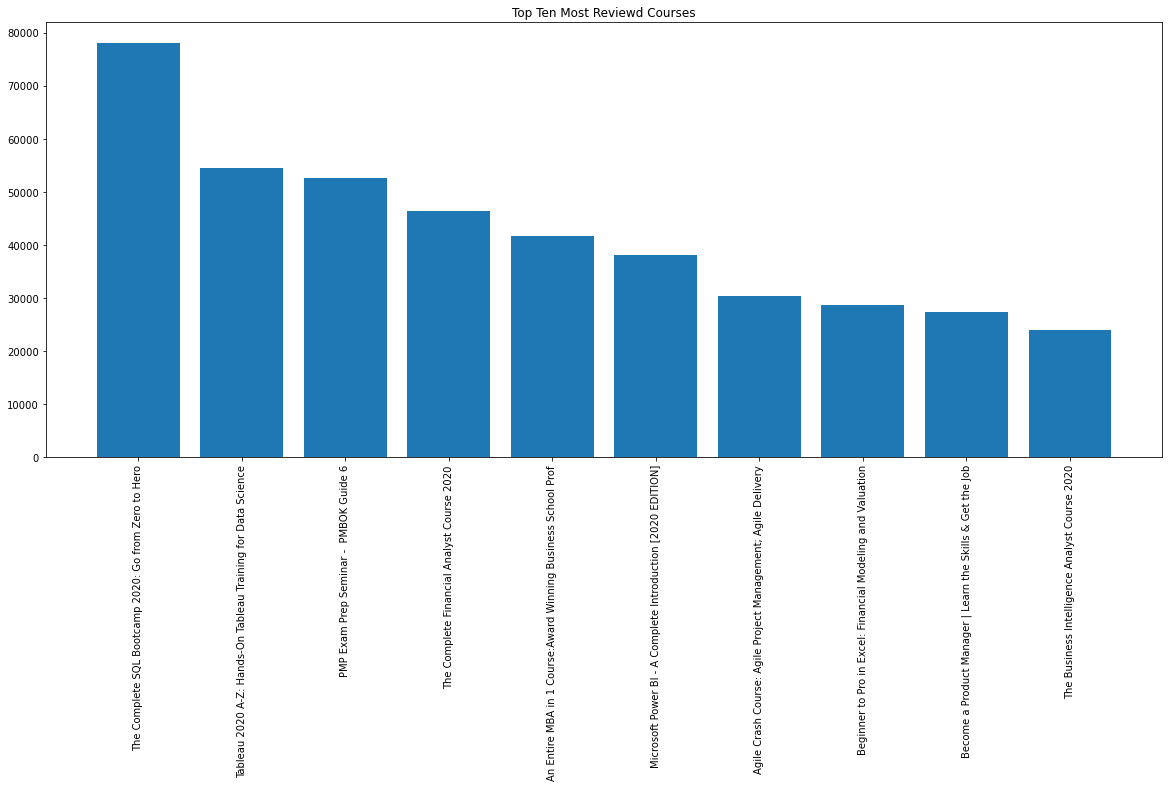

In [36]:
plt.bar(Top10_courses['title'],Top10_courses['num_reviews'])
plt.title('Top Ten Most Reviewd Courses')
plt.gcf().set_size_inches(20,8)
plt.xticks(rotation = 90)
plt.show()

* The Complete SQL Bootcamp 2020: Go from Zero to Hero is Top Most Reviewd course with 78006 Reviews.

# Subscription of course:

In [37]:
df.num_subscribers.max()

374836

In [38]:
df.num_subscribers.nunique()

4319

In [39]:
Top_sub_course = df.sort_values(by='num_subscribers',ascending = False).iloc[:50,:]
Top_sub_course

id                                              title  is_paid  \
4      637930  An Entire MBA in 1 Course:Award Winning Busine...     True   
0      762616  The Complete SQL Bootcamp 2020: Go from Zero t...     True   
3      648826         The Complete Financial Analyst Course 2020     True   
19     980086  Deep Learning Prerequisites: The Numpy Stack i...     True   
1      937678  Tableau 2020 A-Z: Hands-On Tableau Training fo...     True   
15    1202988  The Complete Financial Analyst Training & Inve...     True   
35    1098006  The Complete Presentation and Public Speaking/...     True   
2     1361790             PMP Exam Prep Seminar -  PMBOK Guide 6     True   
22     888716  Introduction to Finance, Accounting, Modeling ...     True   
7      321410  Beginner to Pro in Excel: Financial Modeling a...     True   
5     1208634  Microsoft Power BI - A Complete Introduction [...     True   
9     1653432      The Business Intelligence Analyst Course 2020     True   
16     996228  The Ultimate Hands-On Hadoop - Tame your Big D...     True   
8      673654  Become a Product Manager | Learn the Skills & ...     True   
26     196152  Writing With Flair: How To Become An Exception...     True   
6      864146  Agile Crash Course: Agile Project Management; ...     True   
208    561594          Work From Home: The Amazon FBA MasterPlan     True   
607    792598  Business Bootcamp: 7 Weeks to Start Your Own B...     True   
17     965832        The Complete Investment Banking Course 2020     True   
77    1356742  The Complete Personal Finance Course: Save,Pro...     True   
10    1570206  Microsoft Power BI - Up & Running With Power B...     True   
405    691870                 Statistics with R - Beginner Level     True   
413   1790358  Digital Marketing Automation: Save Time and Ge...     True   
30     736456  Ninja Writing: The Four Levels Of Writing Mastery     True   
134    646076  Agile Project Management: Scrum Step by Step w...     True   
20    1035472  Python for Finance: Investment Fundamentals & ...     True   
11     751792                     Business Analysis Fundamentals     True   
43      48841    Accounting in 60 Minutes - A Brief Introduction     True   
14    1405632  SQL - MySQL for Data Analytics and Business In...     True   
123   1787702  The Complete Business Plan Course (Includes 50...     True   
13    1288044       The Complete Foundation Stock Trading Course     True   
25    1153034    The Complete Shopify Aliexpress Dropship course     True   
18     560388  How to Start an Amazon FBA Store on a Tight Bu...     True   
38    1007240  Power BI A-Z: Hands-On Power BI Training For D...     True   
12     613808            Leadership: Practical Leadership Skills     True   
207    616958  How to come up with killer business ideas: com...     True   
21     308690  Forex Trading A-Z™ - With LIVE Examples of For...     True   
229    637932  101 Crucial Lessons They Don't Teach You In Bu...     True   
47     148902  Fundamentals of Analyzing Real Estate Investments     True   
31     946194  Tableau 20 Advanced Training: Master Tableau i...     True   
42    1802404  The Complete Communication Skills Master Class...     True   
490   1574798  Accounting–Financial Accounting Total-Beginner...     True   
183   1623098  The Complete Cryptocurrency Course: More than ...     True   
421    656720  Scrum Master Training : Case Studies and Confe...     True   
961    760814     Media Training: Have More Confidence on Camera     True   
28     203556  SQL for Data Analysis: Weekender Crash Course ...     True   
1047  2767208       Artificial Intelligence Expert Certification     True   
761   1107110  eCommerce Website: Shopify, Dropshipping, Amaz...     True   
200    170840  How to Write the Ultimate 1 Page Strategic Bus...     True   
913   2964096          Freelance Writing Course: 15 Courses in 1     True   

      num_subscribers  avg_rating   rating  num_reviews  is_wishlisted  \
4        

In [40]:
# Top Fifty Most Subscribed Courses

plt.figure(figsize=(20,7))
sns.barplot(x=Top_sub_course['title'],y=Top_sub_course['num_subscribers'], palette='rainbow')
plt.xticks(rotation = 90)
plt.title("Top Fifty Most Subscribed Courses")

Text(0.5, 1.0, 'Top Fifty Most Subscribed Courses')

**An Entire MBA in 1 Course:Award Winning Business School prof** is Top Most Subscribed Course With **374836 Subscribers**

# 	Finding Relation Between   price_detail__amount   and num_subscribers   to see how many are subscribed according to course amount.

<AxesSubplot:xlabel='num_subscribers', ylabel='price_detail__amount'>

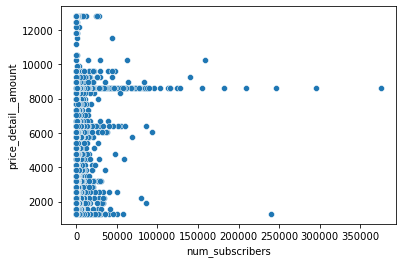

In [41]:
# For Whole data

sns.scatterplot(x= 'num_subscribers',y = 'price_detail__amount',data = df)

<AxesSubplot:xlabel='num_subscribers', ylabel='price_detail__amount'>

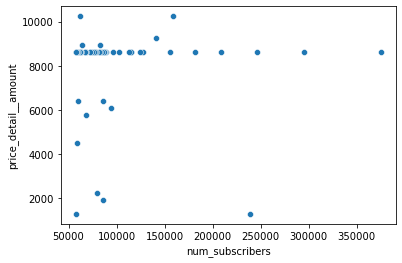

In [42]:
# For TOP 50 subscribed courses

sns.scatterplot(x= 'num_subscribers',y = 'price_detail__amount',data = Top_sub_course)

* Number of Subscribers Increased Between 8000 to 10000 Course amount i.e,.price_detail__amount.

# Customer’s Expectations:

In [43]:
df.num_published_lectures.nunique()

278

In [44]:
df.num_subscribers.nunique()

4319

Text(0.5, 1.0, 'SUBSCRIBERS VS NUMBER OF PUBLISHED LECTURES')

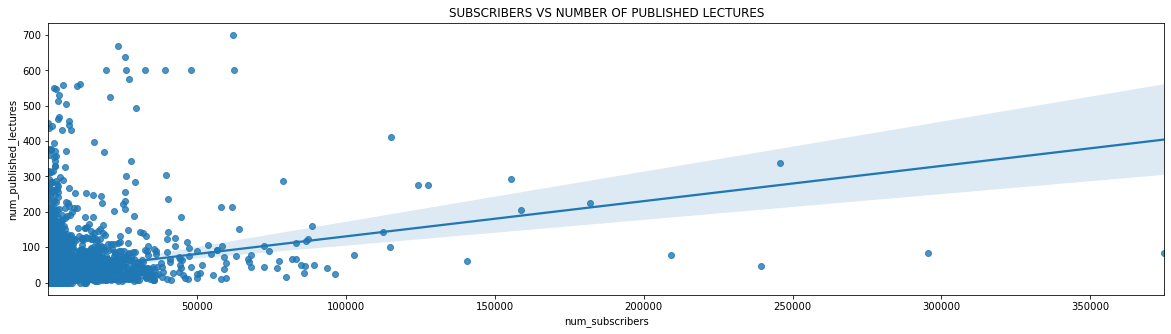

In [45]:
plt.figure(figsize=(20,5))

sns.regplot(y = df['num_published_lectures'],x = df['num_subscribers'])
plt.title("SUBSCRIBERS VS NUMBER OF PUBLISHED LECTURES")

*  The Number of Published Lectures does affect the Subscribers, but there is little correlation.

Text(0.5, 1.0, ' PUBLISHED LECTURES FOR TOP 50 SUBSCRIBED COURSES ')

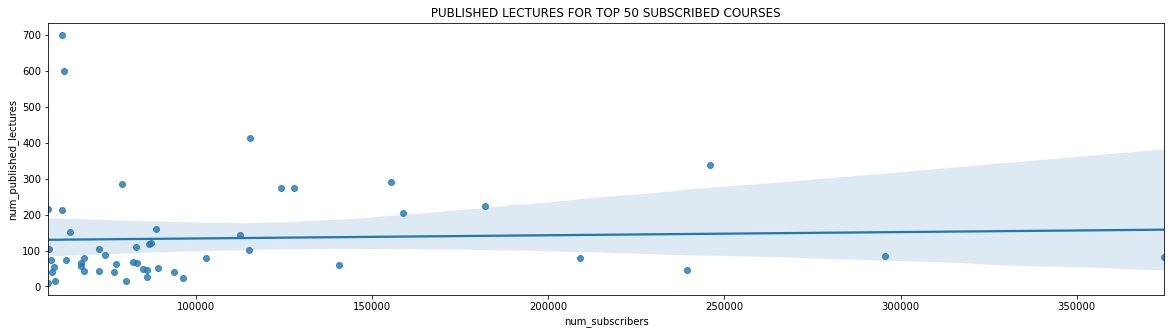

In [46]:
# PUBLISHED LECTURES FOR TOP 50 SUBSCRIBED COURSES:

plt.figure(figsize=(20,5))

sns.regplot(y = Top_sub_course['num_published_lectures'],x = Top_sub_course['num_subscribers'])
plt.title(" PUBLISHED LECTURES FOR TOP 50 SUBSCRIBED COURSES ")

* ALMOST NO RELATION BETWEEN NUMBER OF PUBLISHED LECTURES AND NUMBER OF SUBSCRIBERS FOR TOP 50 SUBSCRIBED COURSES

**Discount price vs number of subscribers**

<AxesSubplot:xlabel='discount_price__amount', ylabel='num_subscribers'>

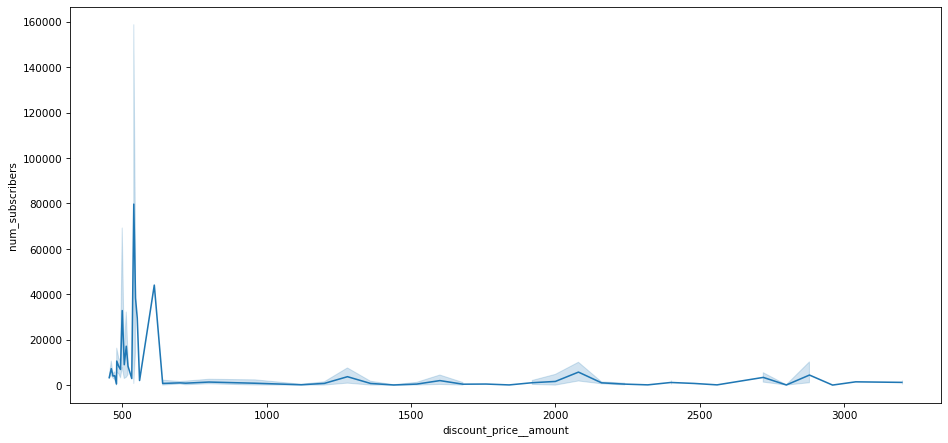

In [47]:
plt.figure(figsize=(15,7),dpi=75)
sns.lineplot(data=df,x='discount_price__amount',y='num_subscribers')

* Between 500 and 1000 subscribers are increased** __BUT__ **subscribers are not increasing with increasing discount_price_amount.



<AxesSubplot:xlabel='discount_price__amount', ylabel='num_subscribers'>

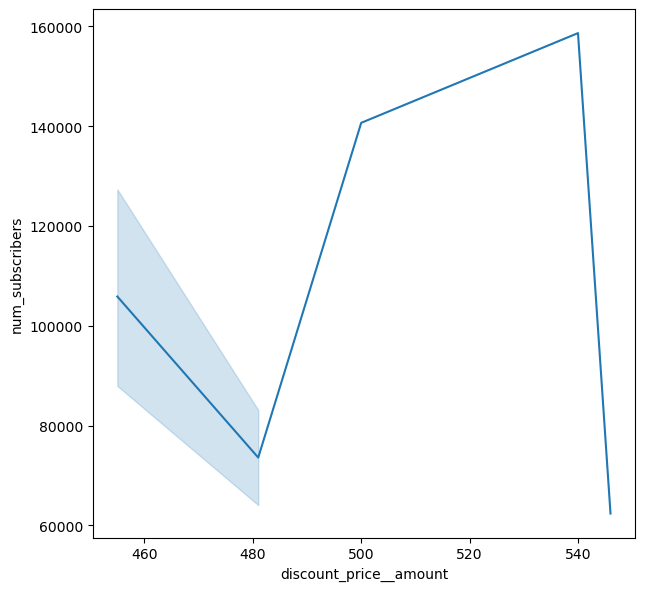

In [48]:
# discount_price__amount wise Top 50 subscribed courses:


plt.figure(figsize=(7,7),dpi=100)
sns.lineplot(data=Top_sub_course,x='discount_price__amount',y='num_subscribers')

* Subscribers are incresed for top Subscribed courses between 480 and 540 discount_price_amount.

# Category distribution:

In [49]:
df.head(2)

id                                              title  is_paid  \
0  762616  The Complete SQL Bootcamp 2020: Go from Zero t...     True   
1  937678  Tableau 2020 A-Z: Hands-On Tableau Training fo...     True   

   num_subscribers  avg_rating   rating  num_reviews  is_wishlisted  \
0           295509     4.66019  4.67874        78006          False   
1           209070     4.58956  4.60015        54581          False   

   num_published_lectures  num_published_practice_tests  \
0                      84                             0   
1                      78                             0   

                    created  discount_price__amount  price_detail__amount  \
0 2016-02-14 22:57:48+00:00                   455.0                  8640   
1 2016-08-22 12:10:18+00:00                   455.0                  8640   

  date_created  year  month  day  
0   2016-02-14  2016      2   14  
1   2016-08-22  2016      8   22

In [50]:
df.num_published_practice_tests.count()

9447

In [51]:
df.num_published_practice_tests.value_counts()

0    9039
1     153
2     137
6      32
4      31
3      28
5      27
Name: num_published_practice_tests, dtype: int64

In [52]:
# PRINT PROPORTION instead of number

df.num_published_practice_tests.value_counts(normalize=True)*100

0    95.681169
1     1.619562
2     1.450196
6     0.338732
4     0.328147
3     0.296390
5     0.285805
Name: num_published_practice_tests, dtype: float64

<AxesSubplot:title={'center':'Num_published_practice_tests'}>

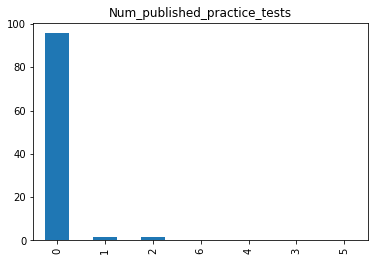

In [53]:
# Draw a plot

(df.num_published_practice_tests.value_counts(normalize=True)*100).plot.bar(title='Num_published_practice_tests')

* 95% of Num_published_practice_tests are Zero(0)


In [54]:
df.price_detail__amount.value_counts().count()

36

In [55]:
df.price_detail__amount.value_counts(normalize= True)*100

8640     26.516354
1280     21.054303
3200      8.817614
6400      7.632053
1600      5.811369
1920      4.848100
2560      3.133270
2240      2.794538
6080      2.688684
4800      2.074733
2880      1.799513
5120      1.344342
8000      1.291415
3840      1.270245
5760      1.185562
4480      0.910342
12800     0.857415
7680      0.762147
3520      0.762147
4160      0.751561
6720      0.497512
8960      0.497512
5440      0.465756
8320      0.465756
9600      0.444586
7040      0.444586
9280      0.306976
7360      0.296390
11840     0.063512
10240     0.052927
12480     0.052927
9920      0.031756
10560     0.021171
11520     0.021171
12160     0.021171
11200     0.010585
Name: price_detail__amount, dtype: float64

<AxesSubplot:title={'center':'price_detail__amount'}>

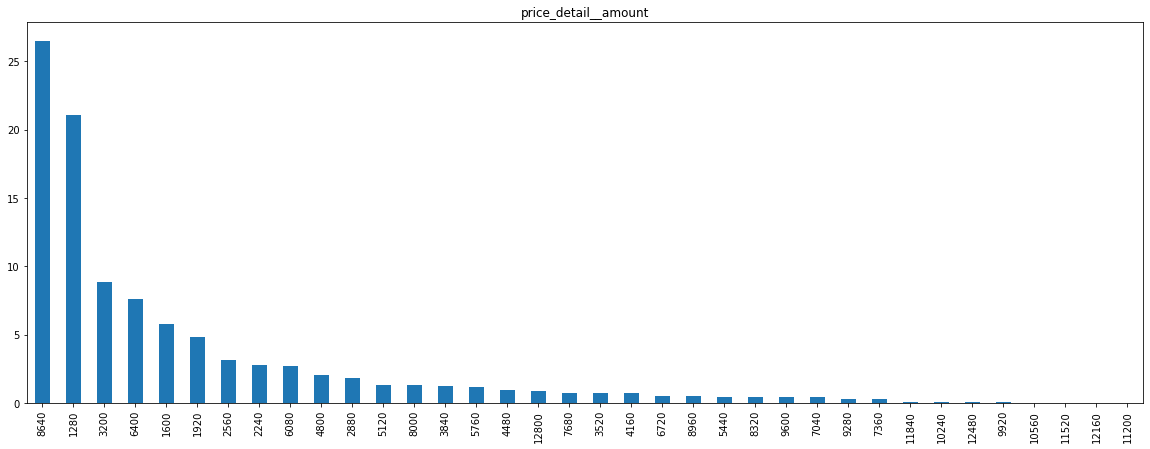

In [56]:
plt.figure(figsize=(20,7))

(df.price_detail__amount.value_counts(normalize= True)*100).plot.bar(title='price_detail__amount')

* More than 25% of price_detail__amount is Distributed with 8640 Course Price.

# Yearly Performance:

In [57]:
df.head(2)

id                                              title  is_paid  \
0  762616  The Complete SQL Bootcamp 2020: Go from Zero t...     True   
1  937678  Tableau 2020 A-Z: Hands-On Tableau Training fo...     True   

   num_subscribers  avg_rating   rating  num_reviews  is_wishlisted  \
0           295509     4.66019  4.67874        78006          False   
1           209070     4.58956  4.60015        54581          False   

   num_published_lectures  num_published_practice_tests  \
0                      84                             0   
1                      78                             0   

                    created  discount_price__amount  price_detail__amount  \
0 2016-02-14 22:57:48+00:00                   455.0                  8640   
1 2016-08-22 12:10:18+00:00                   455.0                  8640   

  date_created  year  month  day  
0   2016-02-14  2016      2   14  
1   2016-08-22  2016      8   22

<AxesSubplot:xlabel='year', ylabel='avg_rating'>

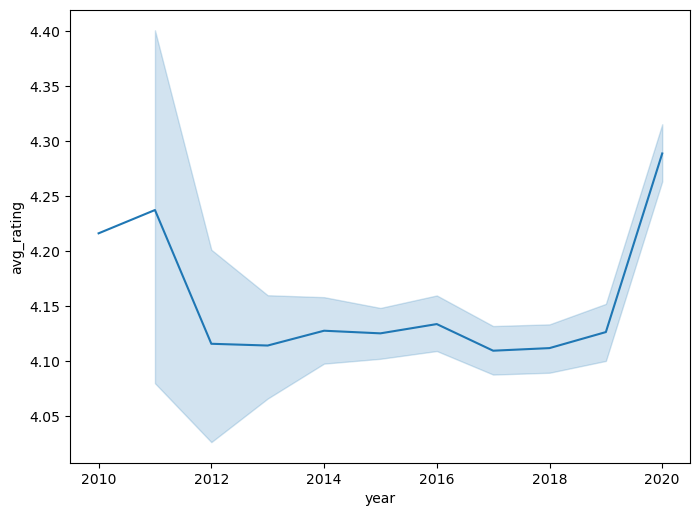

In [58]:
# Year wise Average Rating:

plt.figure(figsize=(8,6),dpi=100)
sns.lineplot(data=df,x='year',y='avg_rating')

* AVERAGE RATING REDUCED BETWEEN 2011 - 2019  & INCREASED FROM 2019.

<AxesSubplot:xlabel='year', ylabel='num_subscribers'>

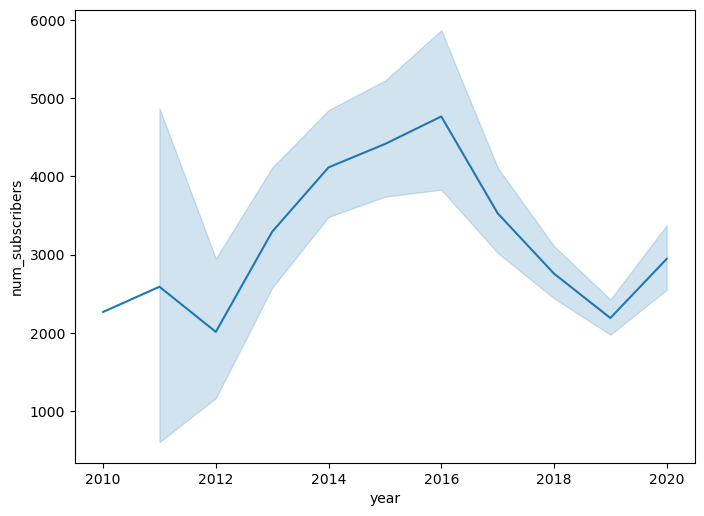

In [59]:
# Year wise Subscribers:

plt.figure(figsize=(8,6),dpi=100)
sns.lineplot(data=df,x='year',y='num_subscribers')

* Year wise subscribers are incresed from 2012 to 2016 and
* Reduced from 2016 to 2019.

<AxesSubplot:xlabel='year', ylabel='price_detail__amount'>

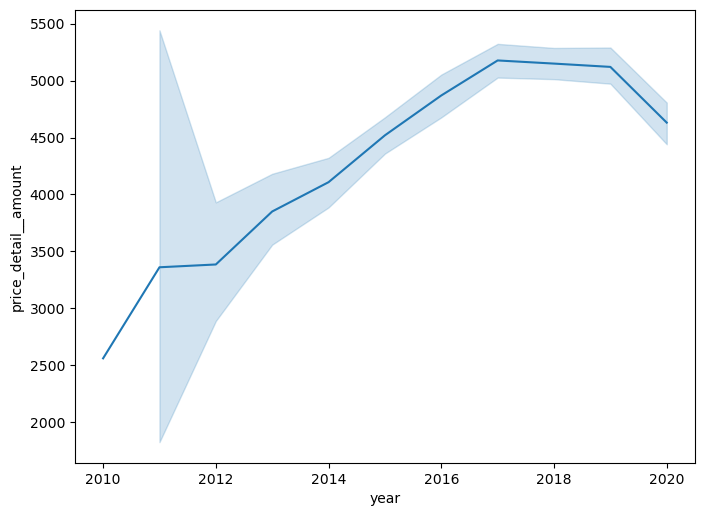

In [60]:
# Year wise course price:

plt.figure(figsize=(8,6),dpi=100)
sns.lineplot(data=df,x='year',y='price_detail__amount')

* Over the years,Year wise course price Incresed , but from 2019 course price falling.

<AxesSubplot:xlabel='year', ylabel='discount_price__amount'>

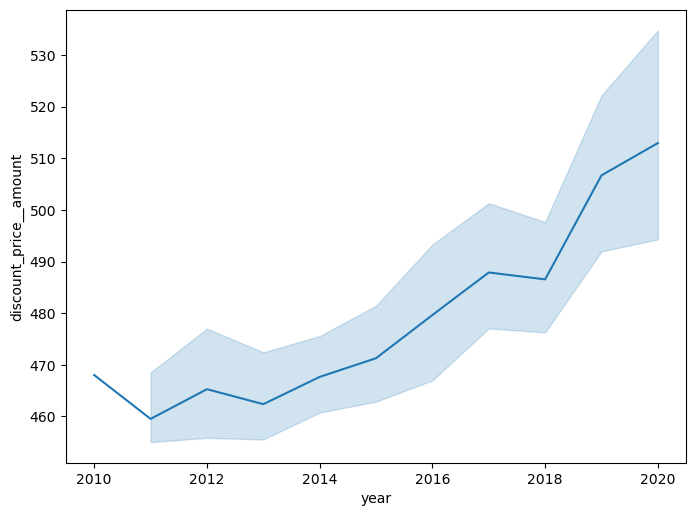

In [61]:
# Year wise discount price:

plt.figure(figsize=(8,6),dpi=100)
sns.lineplot(data=df,x='year',y='discount_price__amount')

* Year wise Discount price Increased from 2011 to 2020.

# Insights:

* No observation is recorded for TRUE.......All observations are FALSE.
* All the courses in this data set are paid courses.

**PUBLISHED LECTURES TO PRICE**

* There is a little correlation with the number of published lectures and prices, the more lectures are published, higher the cost of course.
* Number Of Published Lectures are Incresed Between 8000 to 10000 Price Detail Amount.
* The number of practical test does not really affect the price of courses.

**REVIEWS TO RATINGS**

* The number of reviews does affect the rating but not very much.From the above chart, higher the number of reviews, higher the rating of a course.

**Most Reviewed course:**

* The Complete SQL Bootcamp 2020: Go from Zero to Hero is Top Most Reviewd course with 78006 Reviews.

**Subscription of course:**

*An Entire MBA in 1 Course:Award Winning Business School prof.* is Top Most Subscribed Course With **374836 Subscribers**.



**Finding Relation Between   price_detail__amount   and num_subscribers   to see how many are subscribed according to course amount.**

* Number of Subscribers Increased Between 8000 to 10000 Course amount i.e,.price_detail__amount.

**Customer’s Expectations:**

*  The Number of Published Lectures does affect the Subscribers, but there is little correlation.
* ALMOST NO RELATION BETWEEN NUMBER OF PUBLISHED LECTURES AND NUMBER OF SUBSCRIBERS FOR TOP 50 SUBSCRIBED COURSES.

**Discount price vs number of subscribers:**

* Between 500 and 1000 subscribers are increased** __BUT__ **subscribers are not increasing with increasing discount_price_amount.
* Subscribers are incresed for top Subscribed courses between 480 and 540 discount_price_amount.

**Category distribution:**

* 95% of Num_published_practice_tests are Zero(0).
* More than 25% of price_detail__amount is Distributed with 8640 Course Price.

**Yearly Performance:**

* Average Rating reduced between 2011 - 2019  & Increased from 2019.
* Year wise subscribers are incresed from 2012 to 2016 and
* Reduced from 2016 to 2019 
* Over the years,Year wise course price Incresed , but from 2019 course price falling.
* Year wise Discount price Increased from 2011 to 2020.



In [62]:
df.shape

(9447, 17)

In [63]:
df.columns

Index(['id', 'title', 'is_paid', 'num_subscribers', 'avg_rating', 'rating',
       'num_reviews', 'is_wishlisted', 'num_published_lectures',
       'num_published_practice_tests', 'created', 'discount_price__amount',
       'price_detail__amount', 'date_created', 'year', 'month', 'day'],
      dtype='object')

In [64]:
df.drop(['created'], axis = 1, inplace = True)

In [65]:
df.shape

(9447, 16)

**Creating xlsx  ----->> Excel file**

In [66]:
# Excel File for Tableau Dashboarding:

df.to_excel('C:/Users/DELL/Desktop/BI BOOTCAMP PROJECTS/Business Intelligence on Ed-Tech Data/Ed_tech_EDA_excel.xlsx',index = False)